# Reducing hospital readmissions

## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## 💾 The data
You have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

In [23]:
import pandas as pd
df = pd.read_csv('../data/hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


## 💪 Competition challenge
Create a report that covers the following:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

### 1. What is the most common primary diagnosis by age group?

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Group the data by age and primary diagnosis
grouped = df.groupby(["age", "diag_1"]).size().reset_index(name="count")
# Create a pivot table to show the most common primary diagnosis for each age range
pivot = grouped.pivot(index="age", columns="diag_1", values="count").fillna(0)
most_common = pivot.idxmax(axis=1)
# Add the most common primary diagnosis as a new column in the pivot table
pivot["Most Common Diagnosis"] = most_common
# Reset the index of the pivot table to make the age range a column
result = pivot.reset_index()
# Display the result
display(result)

diag_1,age,Circulatory,Diabetes,Digestive,Injury,Missing,Musculoskeletal,Other,Respiratory,Most Common Diagnosis
0,[40-50),504.0,369.0,271.0,162.0,0.0,100.0,750.0,376.0,Other
1,[50-60),1256.0,393.0,442.0,273.0,0.0,230.0,1164.0,694.0,Circulatory
2,[60-70),1962.0,385.0,554.0,400.0,1.0,373.0,1402.0,836.0,Circulatory
3,[70-80),2392.0,385.0,585.0,444.0,1.0,373.0,1693.0,964.0,Circulatory
4,[80-90),1482.0,181.0,402.0,321.0,2.0,168.0,1269.0,691.0,Circulatory
5,[90-100),228.0,34.0,75.0,66.0,0.0,8.0,220.0,119.0,Circulatory


### 2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 

In [25]:
# first let's compare the readmission rate across primary diagnoses
filtered_data = df[['diag_1', 'readmitted']]
# group data by primary diagnosis and readmission status
grouped = filtered_data.groupby(['diag_1', 'readmitted']).size().reset_index(name='count')
# calculate readmission rate for each primary diagnosis
result = grouped.groupby('diag_1').apply(lambda x: x['count'][x['readmitted'] == 'yes'].sum() / x['count'].sum())
display(grouped)
display(result)

,diag_1,readmitted,count
0,Circulatory,no,4074
1,Circulatory,yes,3750
2,Diabetes,no,810
3,Diabetes,yes,937
4,Digestive,no,1224
5,Digestive,yes,1105
6,Injury,no,939
7,Injury,yes,727
8,Missing,no,2
9,Missing,yes,2


diag_1
Circulatory        0.479294
Diabetes           0.536348
Digestive          0.474453
Injury             0.436375
Missing            0.500000
Musculoskeletal    0.395367
Other              0.451216
Respiratory        0.490761
dtype: float64

In [26]:
# now let's compare the readmission rate for patients diagnosed with diabetes
# add a diabetes column to the dataframe if the diag_1, diag_2, or diag_3 columns contain the string "Diabetes"
df["diabetes"] = df["diag_1"].str.contains("Diabetes") | df["diag_2"].str.contains("Diabetes") | df["diag_3"].str.contains("Diabetes")
filtered_data = df[['diabetes', 'readmitted']]
display(filtered_data)
# group data by diabetes status and readmission status
grouped = filtered_data.groupby(['diabetes', 'readmitted']).size().reset_index(name='count')
# calculate readmission rate for patients with and without diabetes
result = grouped.groupby('diabetes').apply(lambda x: x['count'][x['readmitted'] == 'yes'].sum() / x['count'].sum())
display(grouped)
display(result)


,diabetes,readmitted
0,False,no
1,False,no
2,False,yes
3,True,yes
4,False,no
...,...,...
24995,False,yes
24996,False,yes
24997,False,yes
24998,True,no


,diabetes,readmitted,count
0,False,no,8547
1,False,yes,7665
2,True,no,4699
3,True,yes,4089


diabetes
False    0.472798
True     0.465294
dtype: float64

### 3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

Let's see if we can use this data to build a logistic regression model to predict readmissions.

In [27]:
# remove diabetes column from dataframe
df = df.drop('diabetes', axis=1)

# drop the target variable from the dataframe
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# convert categorical variables to dummy variables
cols = [
    'age',
    'medical_specialty',
    'diag_1',
    'diag_2',
    'diag_3',
    'glucose_test',
    'A1Ctest',
    'change',
    'diabetes_med'
]
df_dummies = pd.get_dummies(X, columns=cols)

In [28]:
# Standardize the data to have zero mean and unit variance.
scaler = StandardScaler()
X = scaler.fit_transform(df_dummies)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.61


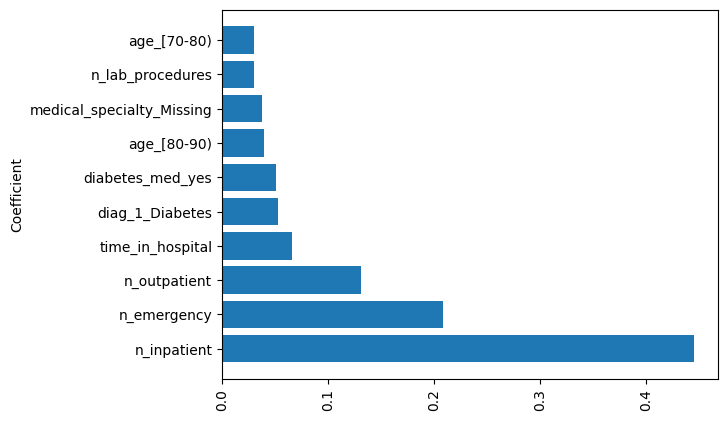

In [35]:
coef = model.coef_.ravel()
feature_names = np.array(df_dummies.columns)
# Sort features by their coefficient magnitude in descending order
idx_sorted = np.argsort(coef)[::-1]
# Select the top 10 features
idx_top10 = idx_sorted[:10]
# Visualize the feature importances
plt.barh(feature_names[idx_top10], coef[idx_top10])
plt.xticks(rotation=90)
plt.ylabel("Coefficient")
plt.show()